In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/kaggle/input/cyber-security-salaries/salaries_cyber.csv


# This is a notebook still in progress

In [2]:
data = pd.read_csv("/kaggle/input/cyber-security-salaries/salaries_cyber.csv")

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [4]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


## Treemap to show salaries distribution by Job Title

In [5]:
grafic = px.treemap(data, path=['job_title', 'salary_in_usd'])
grafic.show()

## Treemap to show salaries and proportion of Remote Jobs

In [6]:
grafic = px.treemap(data, path=['remote_ratio', 'salary_in_usd'])
grafic.show()

## Representations to show the evolution of Remote Jobs over the Years

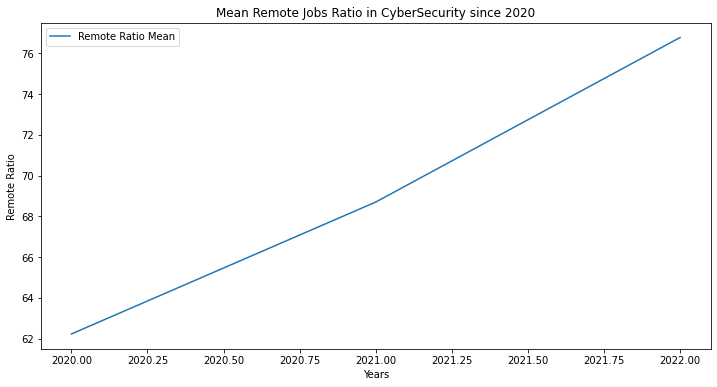

In [7]:
handling_data = data.loc[:,['work_year', 'remote_ratio']]
mean_remote2020 = handling_data.loc[handling_data["work_year"] == 2020]["remote_ratio"].mean()
mean_remote2021 = handling_data.loc[handling_data["work_year"] == 2021]["remote_ratio"].mean()
mean_remote2022 = handling_data.loc[handling_data["work_year"] == 2022]["remote_ratio"].mean()
means = [mean_remote2020, mean_remote2021, mean_remote2022]
years = ["2020", "2021", "2022"]

df_plot = pd.DataFrame(data = means, index = years, columns= ["Remote Ratio Mean"])
df_plot.index = df_plot.index.map(int) # let's change the index values of Years to type integer for plotting
df_plot.plot(kind='line', figsize=(12,6))

plt.title(f'Mean Remote Jobs Ratio in CyberSecurity since 2020')
plt.ylabel('Remote Ratio')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

In [8]:
grafic = px.parallel_categories(data, dimensions=['work_year', 'remote_ratio'])
grafic.show()

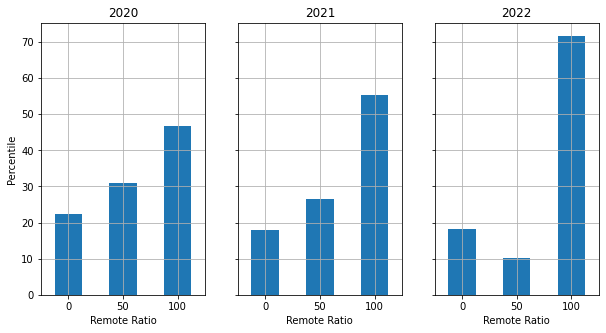

In [9]:
i = 0
figure, axis = plt.subplots(1, 3, sharey = True, figsize = (10,5))

for year in np.sort(data['work_year'].unique()):
    temp = data.loc[data['work_year'] == year]['remote_ratio']
    temp = temp.value_counts()/temp.value_counts().sum()*100
    
    temp.sort_index().plot(ax = axis[i], subplots = True, kind ='bar', grid = True)
    axis[i].set_xlabel('Remote Ratio')  
    axis[i].set_ylabel('Percentile')
    axis[i].set_title(f'{year}')
    axis[i].set_xticklabels([0, 50, 100], rotation=0)
    
    i += 1

plt.show()    

## What's the ratio of each Company Size over the years? And what is the Remote Job Ratio in each of this companies since 2020?

In [10]:
grafic = px.treemap(data, path=['work_year', 'company_size', 'remote_ratio'])
grafic.show()

In [11]:
grafic = px.treemap(data, path=['company_location', 'employee_residence', 'remote_ratio'])
grafic.show()

In [12]:
grafic = px.treemap(data, path=['company_size', 'company_location'])
grafic.show()

In [13]:
#sns.scatterplot(data=data, x="salary_in_usd")